See [The Final Model]  at the end of the file

# sommelier.ai
#### Practical Machine Learning Workshop

### Agenda:
- Data Exploration with pandas
- Modeling with scikit-learn

### Tools and Documentation
- [pandas](https://pandas.pydata.org/pandas-docs/stable/api.html)
- [scikit-learn](http://scikit-learn.org/stable/index.html)
- [matplotlib](https://matplotlib.org/api/api_overview.html)
- [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)


## Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from workshop import boxplot_sorted

sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('.\\data\\winemag-data.zip')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer
1,US,If you're curious about California Grenache Bl...,Tourmaline,88,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan
2,France,"While the acidity is intense, it is balanced b...",NaN,84,15.0,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de Roche Guillon 2013 Beaujolais-Vill...,Gamay,Domaine de Roche Guillon
3,France,Red fruits and a soft tannic profile give a re...,NaN,88,17.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Domaine de Cause 2011 Malbec (Cahors),Malbec,Domaine de Cause
4,Spain,Shows true Priorat depth and minerality while ...,Balcons,90,60.0,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Pinord 2004 Balcons Red (Priorat),Red Blend,Pinord


In [3]:
df.shape

(116973, 13)

## Modeling

In [5]:
from sklearn import metrics
from sklearn.pipeline import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.impute import *
from sklearn.preprocessing import *

from workshop import show_most_informative_features

In [157]:
df['is_good'] = df.points > 88

In [159]:
df.is_good.value_counts()

False    61869
True     55104
Name: is_good, dtype: int64

In [161]:
train = df.drop(['is_good', 'points', 'price'], axis=1)

In [176]:
train_df, test_df, train_labels, test_labels = train_test_split(
    df.drop(['is_good', 'price', 'points'], axis=1), 
    df.is_good,
    random_state=3)

In [178]:
%%time

model = make_pipeline(
            CountVectorizer(),
            MultinomialNB())

model.fit(train_df.taster_twitter_handle, train_labels);

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [174]:
predicted = model.predict(test_df.description)
score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.796
              precision    recall  f1-score   support

       False       0.81      0.80      0.81     15450
        True       0.78      0.80      0.79     13794

   micro avg       0.80      0.80      0.80     29244
   macro avg       0.80      0.80      0.80     29244
weighted avg       0.80      0.80      0.80     29244



In [175]:
%%time

categorical_features = ['country', 'winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                (['year'], make_pipeline(
                    SimpleImputer(strategy='median'),
                    StandardScaler()))),
            SGDClassifier(n_jobs=-1, max_iter=1000))

model.fit(train_df, train_df.is_good)

predicted = model.predict(test_df)

score = metrics.accuracy_score(test_df.is_good, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_df.is_good, predicted))

AttributeError: 'DataFrame' object has no attribute 'is_good'

In [5]:
df.country.value_counts(dropna=False, normalize=True)

US                        0.419635
France                    0.170638
Italy                     0.149616
Spain                     0.051003
Portugal                  0.043805
Chile                     0.034324
Argentina                 0.029101
Austria                   0.025869
Australia                 0.017953
Germany                   0.016594
New Zealand               0.010900
South Africa              0.010806
Israel                    0.003915
Greece                    0.003582
Canada                    0.001975
Hungary                   0.001137
Bulgaria                  0.001069
Romania                   0.000898
Uruguay                   0.000855
Turkey                    0.000710
Georgia                   0.000658
Slovenia                  0.000641
Croatia                   0.000581
England                   0.000564
Mexico                    0.000547
NaN                       0.000496
Moldova                   0.000462
Brazil                    0.000410
Lebanon             

In [25]:
df[df.country == 'US'].sort_values(["points", "price"]).head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4657,US,"Cheese, milkweed and straw make for an unattra...",NaN,80,7.0,Oregon,Willamette Valley,Willamette Valley,Michael Schachner,@wineschach,Montinore 2000 Müller-Thurgau (Willamette Valley),Müller-Thurgau,Montinore
12032,US,"Barely drinkable, although you'll get by at bi...",NaN,80,7.0,California,California,California Other,NaN,NaN,Backhouse 2010 Pinot Noir (California),Pinot Noir,Backhouse
83297,US,The “Reserve” on the label is hardly appropria...,Reserve,80,7.0,California,Monterey,Central Coast,NaN,NaN,Turning Leaf 2001 Reserve Riesling (Monterey),Riesling,Turning Leaf
22751,US,A pop style of pink wine that the Peter Mondav...,Willow Springs White,80,8.0,California,California,California Other,Jim Gordon,@gordone_cellars,CK Mondavi 2013 Willow Springs White Zinfandel...,Zinfandel,CK Mondavi
28264,US,"Simple, soft and dull, with vegetal aromas and...",Reserve,80,8.0,California,California,California Other,NaN,NaN,Oak Grove 2008 Reserve Petite Sirah (California),Petite Sirah,Oak Grove


In [30]:
df.title.describe()

count                                                116973
unique                                               107904
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                     10
Name: title, dtype: object

# what are the worst wines in the US?

In [43]:
df[df.country == "US"].groupby("title")["points", "price"].mean().sort_values(["points", "price"], ascending =[True, False]).head(10)

,points,price
title,,
Millésimé 2005 Scoprire Red (California),80.0,55.0
Casa Tiene Vista NV DeLuz Red (California),80.0,45.0
Millésimé 2008 Scopire Red (Santa Ynez Valley),80.0,45.0
Opolo 2011 Reserve Zinfandel (Paso Robles),80.0,44.0
Catharine Valley 2005 Reserve Cabernet Franc (Finger Lakes),80.0,42.0
Arrowhead Mountain 2008 Primary Red (Sonoma Valley),80.0,40.0
French Hill 2006 Grand Reserve Petit Verdot (California),80.0,40.0
Spann Vineyards 2004 Twenty-Three Barrels Mo Jo Red (Sonoma County),80.0,40.0
Vindemia 2006 Commonwealth Red (South Coast),80.0,40.0


In [146]:
point_vars = df.groupby("variety")["points"].agg([np.var, np.size]).sort_values("var", ascending =False)

In [147]:
point_vars[point_vars['size'] > 5]

,var,size
variety,,
Cabernet Sauvignon-Malbec,22.238095,15
Viognier-Roussanne,21.866667,6
Tinto del Pais,16.395833,16
Tempranillo-Merlot,16.000000,6
Welschriesling,15.418972,23
Syrah-Petite Sirah,14.780952,15
Tinta Roriz,14.125000,8
Semillon-Sauvignon Blanc,13.843972,48
Tokay,13.571429,7


In [ ]:
how many tasters are there?

In [47]:
df.taster_twitter_handle.describe()

count          88923
unique            15
top       @vossroger
freq           23058
Name: taster_twitter_handle, dtype: object

In [67]:
df[pd.isnull(df.taster_twitter_handle)].describe()

,points,price
count,28050.000000,26429.000000
mean,87.852228,35.537289
std,3.173186,32.908774
min,80.000000,4.000000
25%,86.000000,18.000000
50%,87.000000,27.000000
75%,90.000000,44.000000
max,100.000000,900.000000


In [35]:
df.points.describe()

count    116973.000000
mean         88.446539
std           3.038423
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

# Best Big Wine Makers

In [73]:
top20 = df.winery.value_counts(dropna=False)[:20].index

In [74]:
top20

Wines & Winemakers            201
DFJ Vinhos                    197
Testarossa                    193
Williams Selyem               190
Chateau Ste. Michelle         180
Georges Duboeuf               178
Louis Latour                  177
Concha y Toro                 152
Columbia Crest                144
Gary Farrell                  115
Kendall-Jackson               114
Siduri                        109
Albert Bichot                 108
Montes                        107
Undurraga                     106
Lynmar                        104
Jean-Luc and Paul Aegerter    104
Trapiche                      104
V. Sattui                     100
Robert Mondavi                 99
Name: winery, dtype: int64

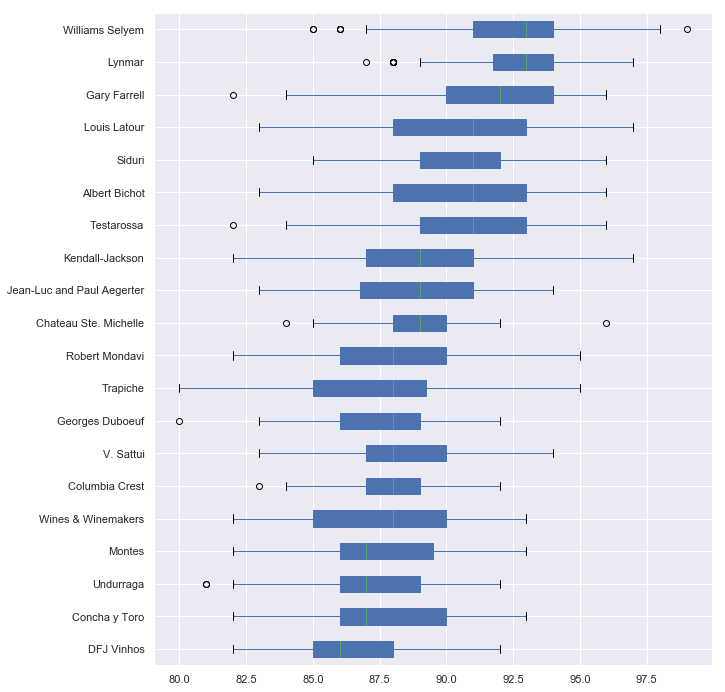

In [71]:
boxplot_sorted(df[df.winery.isin(top20)], by='winery', column='points', vert=False, figsize=(10,12), patch_artist=True)

In [ ]:
df.points.plot.hist()

In [77]:
df.group_by("variety")["points"].mean()

AttributeError: 'DataFrame' object has no attribute 'group_by'

In [151]:
df['price', 'points'] 

KeyError: ('price', 'points')

In [154]:
df.

,points,price
points,1.000000,0.411235
price,0.411235,1.000000


In [ ]:
train_df, test_df, train_labels, test_labels = train_test_split(
    df.drop(['is_good', 'price', 'points'], axis=1), 
    df.is_good,
    random_state=3)

In [185]:
%%time

categorical_features = ['country', 'winery', 'taster_twitter_handle']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                ),
            SGDClassifier(n_jobs=-1, max_iter=1000))


Wall time: 4 ms


In [186]:
%%time
model.fit(train_df, train_labels)


Wall time: 38.9 s


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [187]:
%%time
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.836
              precision    recall  f1-score   support

       False       0.84      0.85      0.85     15450
        True       0.83      0.82      0.82     13794

   micro avg       0.84      0.84      0.84     29244
   macro avg       0.84      0.84      0.84     29244
weighted avg       0.84      0.84      0.84     29244

Wall time: 1.18 s


In [188]:
%%time

categorical_features = ['country', 'winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                ),
            SGDClassifier(n_jobs=-1, max_iter=1000))
model.fit(train_df, train_labels)
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.833
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     15450
        True       0.83      0.81      0.82     13794

   micro avg       0.83      0.83      0.83     29244
   macro avg       0.83      0.83      0.83     29244
weighted avg       0.83      0.83      0.83     29244

Wall time: 38.6 s


In [213]:
%%time

categorical_features = ['country', 'winery', 'taster_twitter_handle']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer()),
              #  ('variety', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                ),
            LogisticRegression(random_state=0, solver='newton-cg'))
model.fit(train_df, train_labels)
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.843
              precision    recall  f1-score   support

       False       0.85      0.86      0.85     15450
        True       0.84      0.83      0.83     13794

   micro avg       0.84      0.84      0.84     29244
   macro avg       0.84      0.84      0.84     29244
weighted avg       0.84      0.84      0.84     29244

Wall time: 13.9 s


In [206]:
%%time

categorical_features = ['country', 'winery', 'taster_twitter_handle']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer(ngram_range=(2,3))),
              #  ('variety', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                ),
            LogisticRegression(random_state=0, solver='newton-cg'))
model.fit(train_df, train_labels)
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.827
              precision    recall  f1-score   support

       False       0.83      0.84      0.84     15450
        True       0.82      0.81      0.82     13794

   micro avg       0.83      0.83      0.83     29244
   macro avg       0.83      0.83      0.83     29244
weighted avg       0.83      0.83      0.83     29244

Wall time: 3min 20s


In [248]:
%%time

df['is_good'] = df.points > 88
df['name'] = df['taster_twitter_handle'].str.cat(df['taster_name'])
train_df, test_df, train_labels, test_labels = train_test_split(
    df.drop(['is_good', 'price', 'points'], axis=1), 
    df.is_good,
    random_state=3)

categorical_features = ['winery', 'variety']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


categorical_features2 = [ 'name']
categorical_transformer2 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))



categorical_features3 = [ 'variety']
categorical_transformer3 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer(strip_accents='unicode')),
                ('description', CountVectorizer(strip_accents='unicode')),
                ('title', TfidfVectorizer(strip_accents='unicode')),
                (categorical_features, categorical_transformer),
                (categorical_features2, categorical_transformer2),
                ),
            #    LogisticRegression())
    LogisticRegression(random_state=0, solver='newton-cg'))
model.fit(train_df, train_labels)
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.858
              precision    recall  f1-score   support

       False       0.86      0.88      0.87     15450
        True       0.86      0.84      0.85     13794

   micro avg       0.86      0.86      0.86     29244
   macro avg       0.86      0.86      0.86     29244
weighted avg       0.86      0.86      0.86     29244

Wall time: 43.4 s


In [236]:
%%time

categorical_features = ['winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


categorical_features2 = [ 'taster_twitter_handle', 'taster_name']
categorical_transformer2 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer(strip_accents='unicode')),
                ('description', CountVectorizer(strip_accents='unicode')),
              #  ('variety', TfidfVectorizer()),
                (categorical_features, categorical_transformer),
                (categorical_features2, categorical_transformer2),
                ),
            #    LogisticRegression())
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto'))
model.fit(train_df, train_labels)
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))

C:\Users\dana\AppData\Local\Continuum\miniconda3\envs\sommelier\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)



Accuracy: 0.846
              precision    recall  f1-score   support

       False       0.85      0.87      0.86     15450
        True       0.85      0.82      0.83     13794

   micro avg       0.85      0.85      0.85     29244
   macro avg       0.85      0.84      0.85     29244
weighted avg       0.85      0.85      0.85     29244

Wall time: 15 s


In [6]:
%%time

df['is_good'] = df.points > 88
df['name'] = df['taster_twitter_handle'].str.cat(df['taster_name'])
train_df, test_df, train_labels, test_labels = train_test_split(
    df.drop(['is_good', 'price', 'points'], axis=1), 
    df.is_good,
    random_state=3)

categorical_features = ['winery', 'variety']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


categorical_features2 = [ 'name']
categorical_transformer2 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))



categorical_features3 = [ 'variety']
categorical_transformer3 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer(strip_accents='unicode', min_df=2, ngram_range=(3,3))),
                ('description', CountVectorizer(strip_accents='unicode')),
                ('title', TfidfVectorizer(strip_accents='unicode')),
                (categorical_features, categorical_transformer),
                (categorical_features2, categorical_transformer2),
                ),
            #    LogisticRegression())
    LogisticRegression(random_state=0, solver='newton-cg'))
model.fit(train_df, train_labels)
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.861
              precision    recall  f1-score   support

       False       0.86      0.88      0.87     15450
        True       0.86      0.84      0.85     13794

   micro avg       0.86      0.86      0.86     29244
   macro avg       0.86      0.86      0.86     29244
weighted avg       0.86      0.86      0.86     29244

Wall time: 1min 33s


In [7]:
%%time

df['is_good'] = df.points > 88
df['name'] = df['taster_twitter_handle'].str.cat(df['taster_name'])
train_df, test_df, train_labels, test_labels = train_test_split(
    df.drop(['is_good', 'price', 'points'], axis=1), 
    df.is_good,
    random_state=3)

categorical_features = ['winery', 'variety']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


categorical_features2 = [ 'name']
categorical_transformer2 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))



categorical_features3 = [ 'variety']
categorical_transformer3 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer(strip_accents='unicode', min_df=3, ngram_range=(2,3))),
                ('description', CountVectorizer(strip_accents='unicode')),
                ('title', TfidfVectorizer(strip_accents='unicode')),
                (categorical_features, categorical_transformer),
                (categorical_features2, categorical_transformer2),
                ),
            #    LogisticRegression())
    LogisticRegression(random_state=0, solver='newton-cg'))
model.fit(train_df, train_labels)
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.862
              precision    recall  f1-score   support

       False       0.86      0.88      0.87     15450
        True       0.86      0.84      0.85     13794

   micro avg       0.86      0.86      0.86     29244
   macro avg       0.86      0.86      0.86     29244
weighted avg       0.86      0.86      0.86     29244

Wall time: 3min 47s


# The Final Model

In [10]:
%%time

df['is_good'] = df.points > 88
df['name'] = df['taster_twitter_handle'].str.cat(df['taster_name'])
train_df, test_df, train_labels, test_labels = train_test_split(
    df.drop(['is_good', 'price', 'points'], axis=1), 
    df.is_good,
    random_state=3)

categorical_features = ['winery', 'variety']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


categorical_features2 = [ 'name']
categorical_transformer2 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))



categorical_features3 = [ 'variety']
categorical_transformer3 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))


model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer(strip_accents='unicode', min_df=3, ngram_range=(2,3))),
                ('description', CountVectorizer(strip_accents='unicode')),
                ('title', TfidfVectorizer(strip_accents='unicode')),
                (categorical_features, categorical_transformer),
                (categorical_features2, categorical_transformer2),
                ),
            #    LogisticRegression())
    LogisticRegression(random_state=0, solver='newton-cg'))
model.fit(train_df, train_labels)
predicted = model.predict(test_df)

score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.862
              precision    recall  f1-score   support

       False       0.86      0.88      0.87     15450
        True       0.86      0.84      0.85     13794

   micro avg       0.86      0.86      0.86     29244
   macro avg       0.86      0.86      0.86     29244
weighted avg       0.86      0.86      0.86     29244

Wall time: 1min 47s
